In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [4]:
heart_disease = pd.read_csv('heart_disease.csv')
heart_disease.isna().sum()
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']


##split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## fit the model

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)
y_pred_pos = y_pred[:, 1]
y_pred_pos

array([0.19, 0.03, 0.51, 0.95, 0.57, 0.41, 0.95, 0.65, 0.65, 0.2 , 0.08,
       0.91, 0.44, 0.39, 0.71, 0.31, 0.8 , 0.97, 0.19, 0.02, 0.83, 0.4 ,
       0.98, 0.32, 0.91, 0.98, 0.64, 0.16, 0.08, 0.48, 0.63, 0.69, 0.75,
       0.18, 0.74, 0.31, 0.17, 0.71, 0.15, 0.66, 0.42, 0.11, 0.82, 0.96,
       0.59, 0.29, 0.98, 0.85, 0.07, 0.47, 0.62, 0.41, 0.95, 0.18, 0.68,
       0.99, 0.11, 0.89, 0.31, 0.87, 0.83])

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_pos)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.06666667,
       0.06666667, 0.1       , 0.13333333, 0.13333333, 0.16666667,
       0.2       , 0.2       , 0.23333333, 0.23333333, 0.26666667,
       0.26666667, 0.3       , 0.33333333, 0.33333333, 0.36666667,
       0.46666667, 0.53333333, 0.66666667, 0.76666667, 0.9       ,
       1.        ])

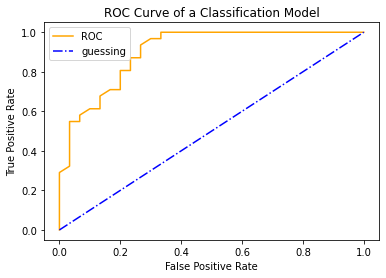

In [24]:
def roc_plot(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='dashdot', label='guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve of a Classification Model')
    plt.legend()
    plt.show;
    
    
roc_plot(fpr, tpr)